# Boston Housing Project

***----------------------------------------------------------------------------------------------------------------------------------------------------------***

## Load the dataset

In [2]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


***----------------------------------------------------------------------------------------------------------------------------------------------------------***

## Housing prices in relation with Charles River bound

### 1. Visualize median value of owner-occupied homes (MEDV)

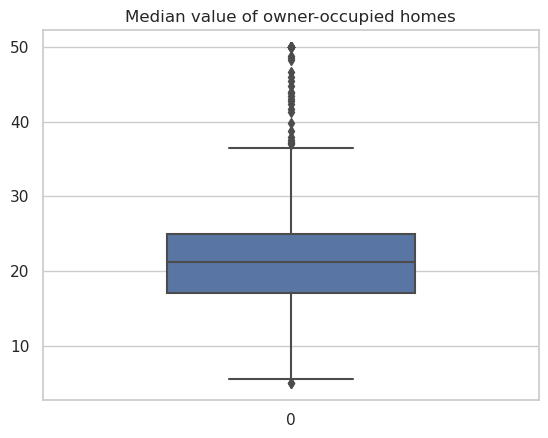

In [53]:
# Using box plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(boston_df["MEDV"], width=0.5)
plt.title("Median value of owner-occupied homes")
plt.show()

### 2. Visualize the Charles River bounce variable

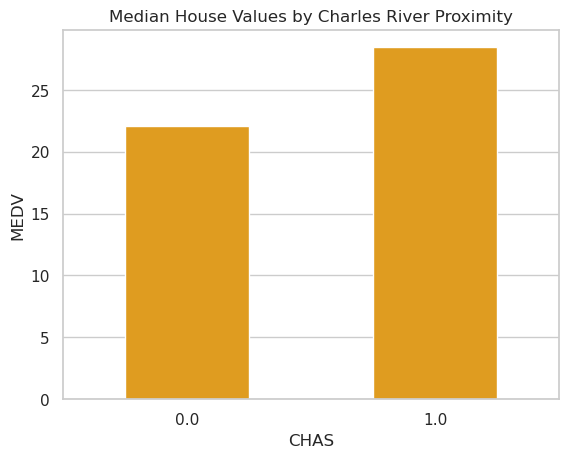

In [54]:
# Using bar plot
sns.set(style="whitegrid")
sns.barplot(boston_df, x=boston_df["CHAS"], y=boston_df["MEDV"], errorbar=None, color="orange", width=0.5)
plt.title("Median House Values by Charles River Proximity")
plt.show()

### 3. T-test for independent samples: MEDV and CHAS

One of the important assumptions for t-test is equal variances between groups. I use Levene's Test to check for equality of variances between Median value of houses located along the Charles River vs those that are not along the river.

**Levene's Test hypothesis:**
- $H_0$: Variances in median house prices are not significantly different between 2 groups (along the river vs not along the river)
- $H_1$: Variances in median house prices are significantly different between 2 groups (along the river vs not along the river)

In [43]:
import scipy.stats
from scipy.stats import levene

# Group the house prices with CHAS variable
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform Levene's Test
statistic, p_value = levene(river, no_river, center='mean')

# Ouput the result
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis, we have enough evidence to conclude significant difference between variances of 2 groups.")
else:
    print("Fail to reject null hypothesis, there's not enough evidence to conclude significant difference between variances of 2 groups.")

Levene's test statistic: 8.75190489604598
p-value: 0.003238119367639829
Reject null hypothesis, we have enough evidence to conclude significant difference between variances of 2 groups.


**T-test for independent samples, state the hypothesis:**
- $H_0$: There's no significant difference in median value of houses bounced by the Charles River
- $H_1$: There's significant difference in median value of houses bounced by the Charles River

In [44]:
from scipy.stats import ttest_ind

# Perform T-test
ttest_statistic, p_value = ttest_ind(river, no_river, equal_var=False)

# Output
print ("T-test statistic:", ttest_statistic,"\np-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis, we have enough evidence to conclude significant difference between median house prices of 2 groups.")
else:
    print("Fail to reject null hypothesis, there's not enough evidence to conclude significant difference between median house prices of 2 groups.")

T-test statistic: 3.113291312794837 
p-value: 0.003567170098137517
Reject null hypothesis, we have enough evidence to conclude significant difference between median house prices of 2 groups.


***----------------------------------------------------------------------------------------------------------------------------------------------------------***

## Housing prices in relation with their Ages

### 1. Visualize the MEDV variable vs the AGE variable.
Divide the AGE variable into 3 groups:
- 35 years & younger
- between 35 & 70 years
- 70 years & older

In [15]:
# Create new column for 3 age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years & younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'AGE_GROUP'] = 'between 35 & 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years & older'

boston_df['AGE_GROUP'].head()

0    between 35 & 70 years
1         70 years & older
2    between 35 & 70 years
3    between 35 & 70 years
4    between 35 & 70 years
Name: AGE_GROUP, dtype: object

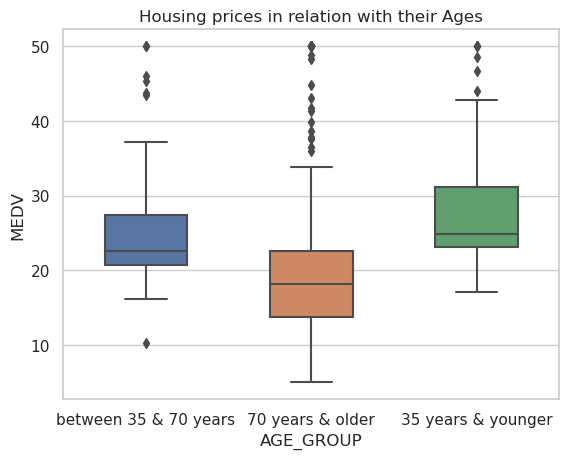

In [55]:
# Using box plot
sns.boxplot(boston_df, x='AGE_GROUP', y='MEDV', width=0.5)
plt.title("Housing prices in relation with their Ages")
plt.show()

### 2. ANOVA: MEDV and AGE

The assumption of homogeneity of variances is also important when using ANOVA. I continue to use Levene's Test to check for equality of variances among different groups. 

**Levene's Test hypothesis:**
- $H_0$: Variances in median house prices are not significantly different among 3 age groups
- $H_1$: Variances in median house prices are significantly different among 3 groups

In [45]:
# Group the house prices with AGE_GROUP variable
thirtyThree_younger = boston_df[boston_df['AGE_GROUP'] == '35 years & younger']['MEDV']
thirtyThree_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 & 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years & older']['MEDV']

# Perform Levene's Test
statistic, p_value = levene(thirtyThree_younger, thirtyThree_seventy, seventy_older, center='mean')

# Ouput the result
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis, we have enough evidence to conclude significant difference among variances of 3 groups.")
else:
    print("Fail to reject null hypothesis, there's not enough evidence to conclude significant difference among variances of 3 groups.")

Levene's test statistic: 2.7806200293748304
p-value: 0.06295337343259205
Fail to reject null hypothesis, there's not enough evidence to conclude significant difference among variances of 3 groups.


**ANOVA test hypothesis:**
- $H_0$: There's no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940
- $H_1$: There's significant difference in median values of houses for each proportion of owner occupied units built prior to 1940

In [46]:
from scipy.stats import f_oneway

# Perform ANOVA
f_statistic, p_value = f_oneway(thirtyThree_younger, thirtyThree_seventy, seventy_older)

# Output
print ("F-test statistic:", f_statistic,"\np-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis, we have enough evidence to conclude significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to reject null hypothesis, there's not enough evidence to conclude significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")

F-test statistic: 36.40764999196599 
p-value: 1.7105011022702984e-15
Reject null hypothesis, we have enough evidence to conclude significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.


***----------------------------------------------------------------------------------------------------------------------------------------------------------***

## Nitric Oxide Concentration in relation with Business Activities

### 1. Visualize the relationship between Nitric oxide concentrations & the proportion of non-retail business acres per town.

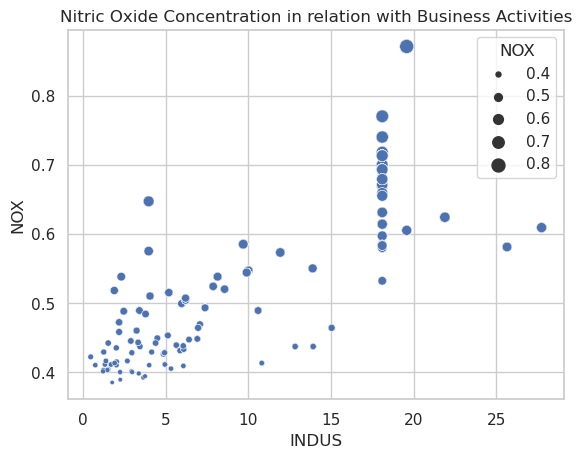

In [56]:
# Using scatter plot
sns.scatterplot(boston_df, x='INDUS', y='NOX', size='NOX', sizes=(10, 100))
plt.title("Nitric Oxide Concentration in relation with Business Activities")
plt.show()

### 2. Pearson Correlation: NOX and INDUS

**Pearson Correlation hypothesis:**
- $H_0$: Nitric oxide concentration is not related to proportion of non-retail business acres per town
- $H_1$: Nitric oxide concentration is related to proportion of non-retail business acres per town

In [47]:
from scipy.stats import pearsonr

# Perform Pearson Correlation calculation
pearson_stat, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output
print ("Pearson Correlation coefficient:", pearson_stat,"\np-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis, we have enough evidence to conclude Nitric oxide concentration is related to proportion of non-retail business acres per town.")
else:
    print("Fail to reject null hypothesis, there's not enough evidence to conclude Nitric oxide concentration is related to proportion of non-retail business acres per town.")

Pearson Correlation coefficient: 0.7636514469209151 
p-value: 7.913361061239527e-98
Reject null hypothesis, we have enough evidence to conclude Nitric oxide concentration is related to proportion of non-retail business acres per town.


***----------------------------------------------------------------------------------------------------------------------------------------------------------***

# Housing prices in relation with Distance to Employment Centres

To answer the question about the impact of an additional weighted distance to the 5 Boston employment centres on the median value of owner occupied homes I use $Regression Analysis$ with independent variable (X) is the distance ("DIS") and dependent variable (Y) is the median value of homes (MEDV).

In [50]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# Regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        03:35:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **p-value < 0.05**, reject null hypothesis, we have enough evidence to conclude there is a relationship between house prices in Boston and their weighted distance to employment centres in the city.

- **Coef DIS = 1.0916** means that on average, as the distance to the employment centres increases by one unit, the house price increases by **1.0916 units**. The positive sign indicates a positive relationship so based on the given model, houses farther from the employment centres tend to have higher prices compared to closer ones.

- With **R-squared = 0.062**, we can comment on the fitness of this regression model. The model, considering distance alone, explains about **6.2%** of the variability in house prices. While this is a small proportion, it indicates that distance contributes to the explanation of house price differences.

***----------------------------------------------------------------------------------------------------------------------------------------------------------***

## Pupil-teacher ratio by town visualization

Visualize the pupil to teacher ratio.

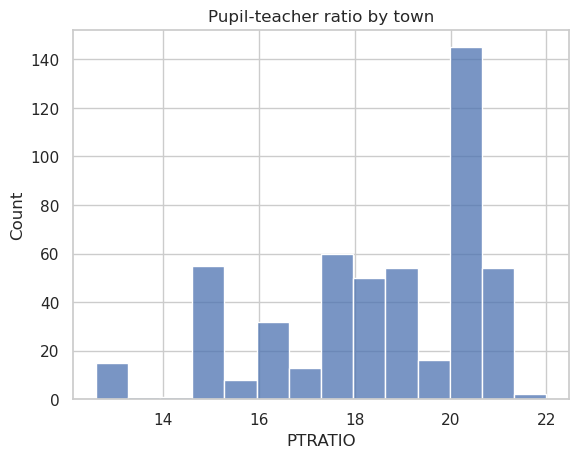

In [57]:
# Using histogram
sns.histplot(boston_df['PTRATIO'])
plt.title("Pupil-teacher ratio by town")
plt.show()